In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [92]:
# Load dataset
df = pd.read_csv("/kaggle/input/dst-dataset/data.csv")

In [93]:
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,period,timedelta,dst,bx_gse,by_gse,bz_gse,theta_gse,phi_gse,bx_gsm,by_gsm,bz_gsm,theta_gsm,phi_gsm,bt,density,speed,temperature,source
0,train_a,0 days 00:00:00,-7,-5.55,3.00,1.25,11.09,153.37,-5.55,3.00,1.25,11.09,153.37,6.80,1.53,383.92,110237.0,ac
1,train_a,0 days 01:00:00,-10,-6.56,0.27,1.35,11.21,178.22,-6.56,0.27,1.35,11.21,178.22,7.01,0.36,317.16,NaN,ac
2,train_a,0 days 02:00:00,-10,-7.22,0.82,2.02,15.01,174.17,-7.22,0.82,2.02,15.01,174.17,7.84,1.27,336.55,44423.0,ac
3,train_a,0 days 03:00:00,-6,-6.83,1.33,3.32,24.42,170.00,-6.83,1.33,3.32,24.42,170.00,8.02,0.77,352.57,45112.0,ac
4,train_a,0 days 04:00:00,-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
df.dropna(inplace=True)

In [95]:
# # Compute IMF clock angle
# df['theta_c'] = np.arctan2(df['by_gse'], df['bz_gse']) * (180 / np.pi)

In [96]:
# Add lag features (DST at previous time steps)
df['dst_t-1'] = df['dst'].shift(1)
df['dst_t-2'] = df['dst'].shift(2)
df['dst_t-3'] = df['dst'].shift(3)

In [97]:
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,period,timedelta,dst,bx_gse,by_gse,bz_gse,theta_gse,phi_gse,bx_gsm,by_gsm,...,theta_gsm,phi_gsm,bt,density,speed,temperature,source,dst_t-1,dst_t-2,dst_t-3
0,train_a,0 days 00:00:00,-7,-5.55,3.00,1.25,11.09,153.37,-5.55,3.00,...,11.09,153.37,6.80,1.53,383.92,110237.0,ac,NaN,NaN,NaN
2,train_a,0 days 02:00:00,-10,-7.22,0.82,2.02,15.01,174.17,-7.22,0.82,...,15.01,174.17,7.84,1.27,336.55,44423.0,ac,-7.0,NaN,NaN
3,train_a,0 days 03:00:00,-6,-6.83,1.33,3.32,24.42,170.00,-6.83,1.33,...,24.42,170.00,8.02,0.77,352.57,45112.0,ac,-10.0,-7.0,NaN
5,train_a,0 days 05:00:00,3,-5.82,-0.56,1.67,14.90,185.67,-5.82,-0.56,...,14.90,185.67,6.43,4.67,375.07,109324.0,ac,-6.0,-10.0,-7.0
6,train_a,0 days 06:00:00,5,-2.39,-5.41,1.13,10.51,244.74,-2.39,-5.41,...,10.51,244.74,6.40,5.98,415.51,38303.0,ac,3.0,-6.0,-10.0


In [98]:
# Drop initial NaN values after creating lags
df.dropna(inplace=True)

In [99]:
df.head()

,period,timedelta,dst,bx_gse,by_gse,bz_gse,theta_gse,phi_gse,bx_gsm,by_gsm,...,theta_gsm,phi_gsm,bt,density,speed,temperature,source,dst_t-1,dst_t-2,dst_t-3
5,train_a,0 days 05:00:00,3,-5.82,-0.56,1.67,14.90,185.67,-5.82,-0.56,...,14.90,185.67,6.43,4.67,375.07,109324.0,ac,-6.0,-10.0,-7.0
6,train_a,0 days 06:00:00,5,-2.39,-5.41,1.13,10.51,244.74,-2.39,-5.41,...,10.51,244.74,6.40,5.98,415.51,38303.0,ac,3.0,-6.0,-10.0
8,train_a,0 days 08:00:00,3,-0.42,-4.91,-0.79,-9.43,262.93,-0.42,-4.91,...,-9.43,262.93,5.33,6.96,425.05,33965.0,ac,5.0,3.0,-6.0
9,train_a,0 days 09:00:00,1,-3.26,-4.48,0.62,6.28,232.06,-3.26,-4.48,...,6.28,232.06,5.91,8.64,401.96,28994.0,ac,3.0,5.0,3.0
10,train_a,0 days 10:00:00,1,-4.98,-1.98,1.75,17.00,200.93,-4.98,-1.98,...,17.00,200.93,5.97,8.84,391.62,33404.0,ac,1.0,3.0,5.0


In [100]:
df.drop(['period','timedelta', 'source','bt','speed','temperature'], axis=1, inplace=True)

In [101]:
# Select relevant features based on correlation
correlation = df.corr()
top_features = correlation['dst'].abs().sort_values(ascending=False).index[1:11]  # Top 6 correlated
selected_features = list(top_features) + ['dst']  # Add target column

In [102]:
selected_features

['dst_t-1',
 'dst_t-2',
 'dst_t-3',
 'bz_gsm',
 'theta_gsm',
 'bz_gse',
 'density',
 'theta_gse',
 'bx_gsm',
 'bx_gse',
 'dst']

In [103]:
# Keep only selected features
df = df[selected_features]

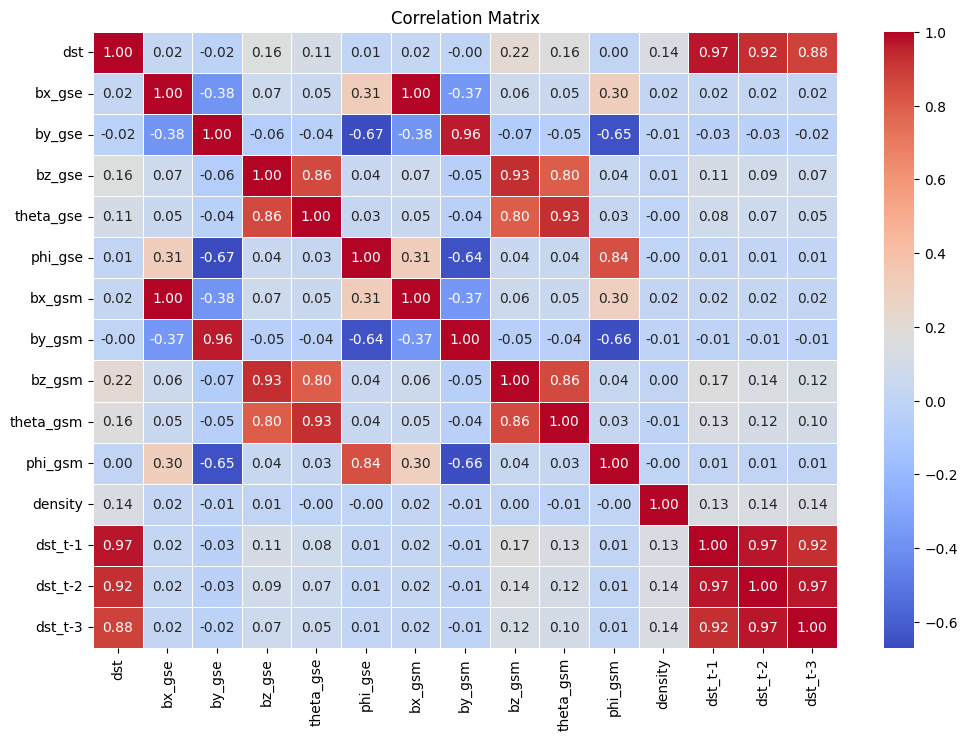

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [105]:
# Split data into train & test sets
X = df.drop(columns=['dst'])
y = df['dst']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [106]:

# Normalize using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [107]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Layer, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization
import tensorflow.keras.backend as K
from tensorflow.keras.losses import LogCosh

class QuadraticLayer(Layer):
    def __init__(self, units, **kwargs):
        super(QuadraticLayer, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.W1 = self.add_weight(shape=(input_shape[-1], self.units), 
                                  initializer="he_normal",  # More stable than Glorot
                                  trainable=True)
        self.W2 = self.add_weight(shape=(input_shape[-1], self.units), 
                                  initializer="he_normal",  # Helps prevent exploding values
                                  trainable=True)
        self.b = self.add_weight(shape=(self.units,), initializer="zeros", trainable=True)

    def call(self, inputs):
        quadratic_output = K.dot(inputs, self.W1) + K.dot(K.square(inputs), self.W2) + self.b
        return K.clip(quadratic_output, -1e3, 1e3)  # Clip extreme values to prevent NaNs

# Define input using Functional API
model = Sequential([
    Dense(10, activation="relu", input_shape=(10,)),

    QuadraticLayer(128),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation='relu'),
    Dropout(0.2),

    QuadraticLayer(32),
    BatchNormalization(),

    Dense(1)  # No activation for regression output
])

# Define an adaptive learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, min_lr=1e-6)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# Compile the model with Adam optimizer and learning rate decay
model.compile(optimizer=Adam(learning_rate=0.0005, clipvalue=1.0),  # Gradient clipping prevents explosion
              loss=LogCosh(),
              metrics=['mae'])

# Train the model with early stopping and LR decay
history = model.fit(X_train_scaled, y_train, 
                    epochs=50, batch_size=32,  # Increased epochs for better learning
                    validation_data=(X_test_scaled, y_test),
                    callbacks=[early_stopping, lr_scheduler])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3140/3140 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 8.3635 - mae: 9.0129 - val_loss: 3.8736 - val_mae: 4.5008 - learning_rate: 5.0000e-04
Epoch 2/50
3140/3140 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 4.1112 - mae: 4.7365 - val_loss: 2.8185 - val_mae: 3.4298 - learning_rate: 5.0000e-04
Epoch 3/50
3140/3140 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 3.8359 - mae: 4.4578 - val_loss: 3.0525 - val_mae: 3.6711 - learning_rate: 5.0000e-04
Epoch 4/50
3140/3140 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 3.6985 - mae: 4.3186 - val_loss: 2.9150 - val_mae: 3.5330 - learning_rate: 5.0000e-04
Epoch 5/50
3140/3140 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 3.6917 - mae: 4.3124 - val_loss: 2.2596 - val_mae: 2.8560 - learning_rate: 5.0000e-04
Epoch 6/50
3140/3140 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 3.6750 - mae: 4.2969 - val_loss: 3.1062 - val_mae: 3.7295 - learning_rate: 5.0000e-04
Epoch 7/50
3140/3140 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 3.6377 - mae: 4.2585 - val_loss: 2.5667 - val_mae: 3.1772 - 

In [108]:
print(X_train_scaled.shape[1])

10


785/785 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Test MSE: 12.8503
Test MAE: 2.5414
Test R² Score: 0.8932


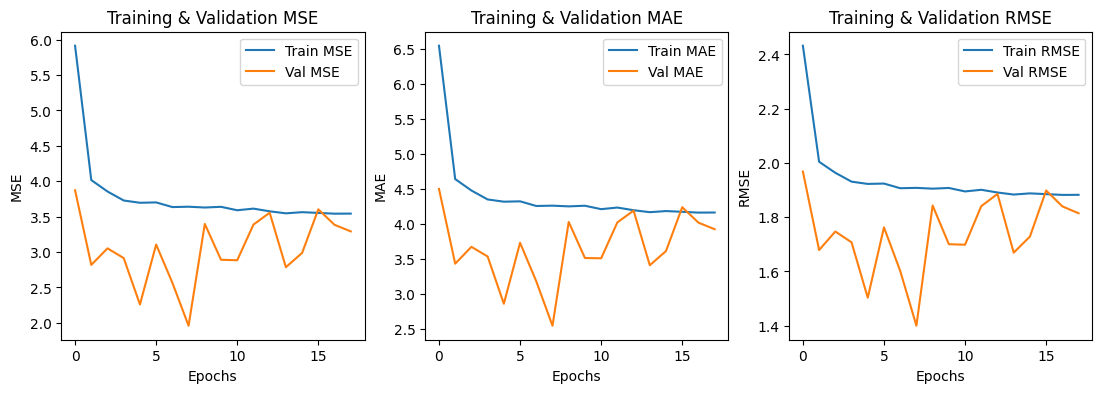

In [109]:
# Predict on test set
y_pred = model.predict(X_test_scaled)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R² Score: {r2:.4f}")

# Plot Training Loss & MAE
plt.figure(figsize=(18, 4))
plt.subplot(1, 4, 1)
plt.plot(history.history['loss'], label='Train MSE')
plt.plot(history.history['val_loss'], label='Val MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.title('Training & Validation MSE')

plt.subplot(1, 4, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('Training & Validation MAE')


# RMSE (derived from MSE per epoch)
train_rmse = np.sqrt(history.history['loss'])
val_rmse = np.sqrt(history.history['val_loss'])

plt.subplot(1, 4, 3)
plt.plot(train_rmse, label='Train RMSE')
plt.plot(val_rmse, label='Val RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Training & Validation RMSE')
plt.legend()


plt.show()

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Adjusted R²
def adjusted_r2_score(r2, n_samples, n_features):
    return 1 - ((1 - r2) * (n_samples - 1)) / (n_samples - n_features - 1)

# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.clip(np.abs(y_true), 1e-8, None))) * 100

# Symmetric MAPE
def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-8))

# AIC and BIC
def calculate_aic_bic(y_true, y_pred, num_params):
    y_true, y_pred = np.array(y_true), np.array(y_pred).reshape(-1)
    n = len(y_true)
    residual_sum_of_squares = np.sum((y_true - y_pred) ** 2)
    sigma2 = residual_sum_of_squares / n + 1e-8  # Stability
    log_likelihood = -0.5 * n * (np.log(2 * np.pi * sigma2) + 1)
    aic = -2 * log_likelihood + 2 * num_params
    bic = -2 * log_likelihood + np.log(n) * num_params
    return aic, bic


MSE: 12.8503
RMSE: 3.5847
MAE: 2.5414
R²: 0.8932
Adjusted R²: 0.8932
SMAPE: 54.74%
AIC: 167116.53
BIC: 296037.66


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


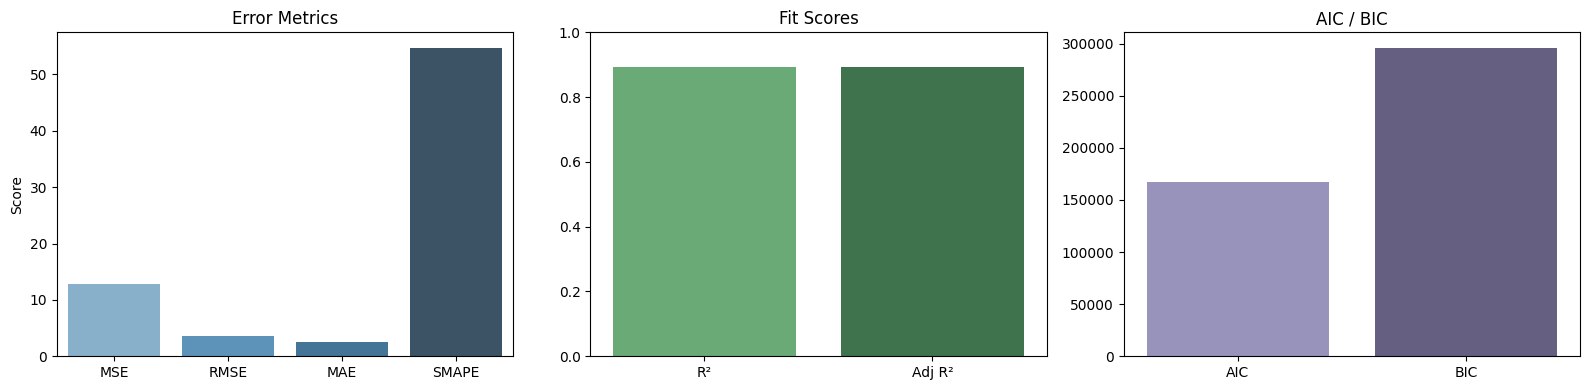

In [111]:
# Flatten predictions
y_pred_flat = y_pred.flatten()

# Metrics
mse = mean_squared_error(y_test, y_pred_flat)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_flat)
r2 = r2_score(y_test, y_pred_flat)
adj_r2 = adjusted_r2_score(r2, len(y_test), X_test.shape[1])
smape = symmetric_mean_absolute_percentage_error(y_test, y_pred_flat)
aic, bic = calculate_aic_bic(y_test, y_pred_flat, model.count_params())

# Print summary
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")
print(f"Adjusted R²: {adj_r2:.4f}")
print(f"SMAPE: {smape:.2f}%")
print(f"AIC: {aic:.2f}")
print(f"BIC: {bic:.2f}")


# Group metrics manually to avoid scale explosion
metrics_cleaned = {
    'MSE': mse,
    'RMSE': rmse,
    'MAE': mae,
    'SMAPE': smape,
    'R²': r2,
    'Adj R²': adj_r2,
    'AIC': aic,
    'BIC': bic
}

# Split into scale-sensitive vs normalized metrics
error_metrics = ['MSE', 'RMSE', 'MAE', 'SMAPE']
score_metrics = ['R²', 'Adj R²']
info_criteria = ['AIC', 'BIC']

# Plot: Regression Error Metrics
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
sns.barplot(x=error_metrics, y=[metrics_cleaned[m] for m in error_metrics], palette="Blues_d")
plt.title("Error Metrics")
plt.ylabel("Score")
plt.grid(False)  # <- removed scale lines

# Plot: Score Metrics
plt.subplot(1, 3, 2)
sns.barplot(x=score_metrics, y=[metrics_cleaned[m] for m in score_metrics], palette="Greens_d")
plt.title("Fit Scores")
plt.ylim(0, 1)
plt.grid(False)  # <- removed scale lines

# Plot: Info Criteria (just for comparison)
plt.subplot(1, 3, 3)
sns.barplot(x=info_criteria, y=[metrics_cleaned[m] for m in info_criteria], palette="Purples_d")
plt.title("AIC / BIC")
#plt.grid(True, linestyle='--', alpha=0.5)
plt.grid(False)  # <- removed scale lines

plt.tight_layout()
plt.show()

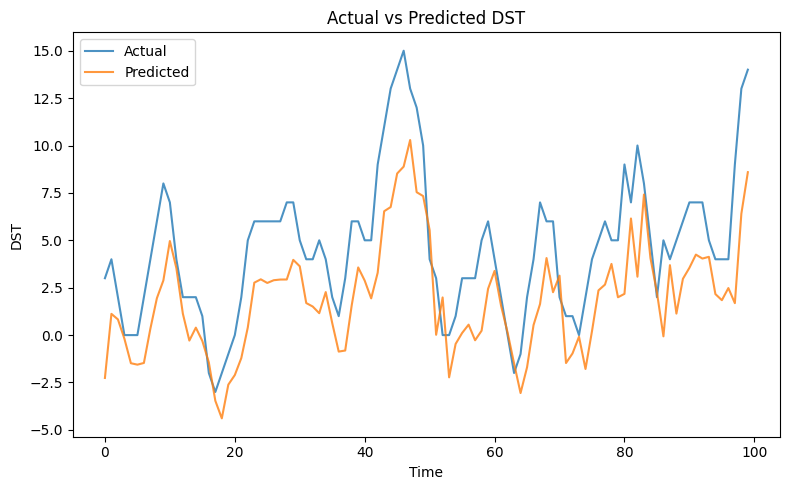

In [112]:
plt.figure(figsize=(8, 5))
plt.plot(y_test.values[:100], label="Actual", alpha=0.8)
plt.plot(y_pred_flat[:100], label="Predicted", alpha=0.8)
plt.title("Actual vs Predicted DST")
plt.xlabel("Time")
plt.ylabel("DST")
plt.legend()
plt.grid(False)  # <- removed scale lines
plt.tight_layout()
plt.show()


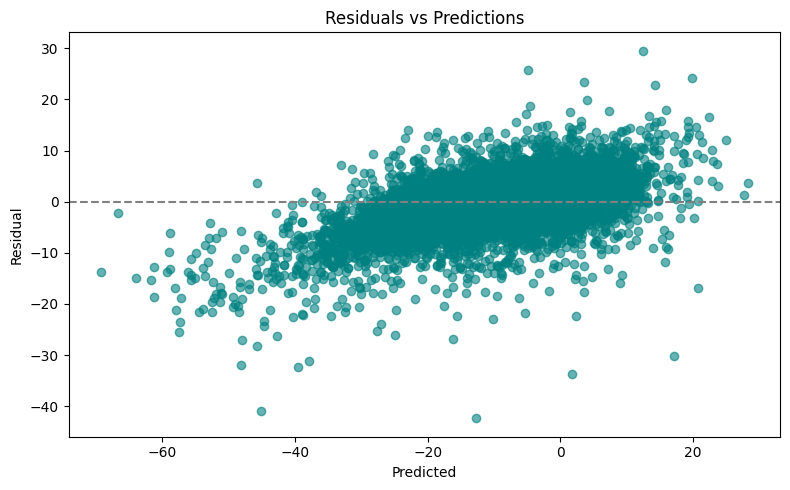

In [113]:
residuals = y_test - y_pred_flat
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_flat, residuals, alpha=0.6, color='teal')
plt.axhline(0, linestyle='--', color='gray')
plt.title("Residuals vs Predictions")
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.grid(False)  # <- removed scale lines
plt.tight_layout()
plt.show()

<ipython-input-114-926560ef1b2f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde=True, color="darkcyan", bins=40)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


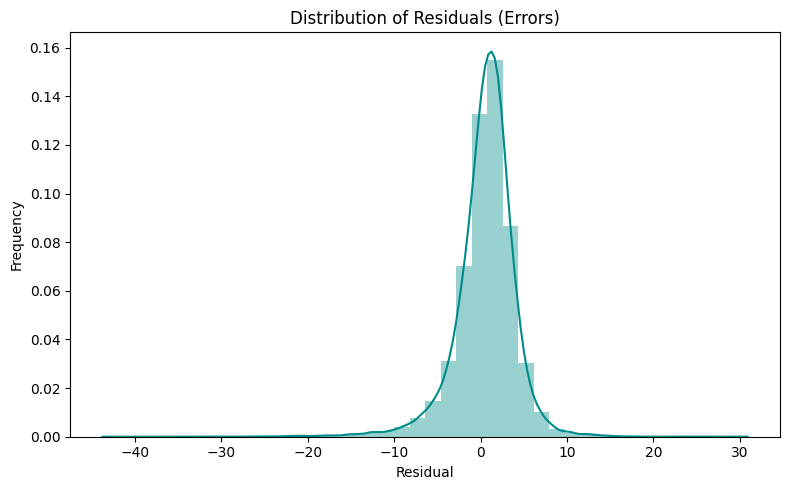

In [114]:
plt.figure(figsize=(8, 5))
sns.distplot(residuals, kde=True, color="darkcyan", bins=40)
plt.title("Distribution of Residuals (Errors)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(False)  # <- removed scale lines
plt.tight_layout()
plt.show()

<ipython-input-115-4aa9938825e4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, kde=True, color="darkcyan", bins=40)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


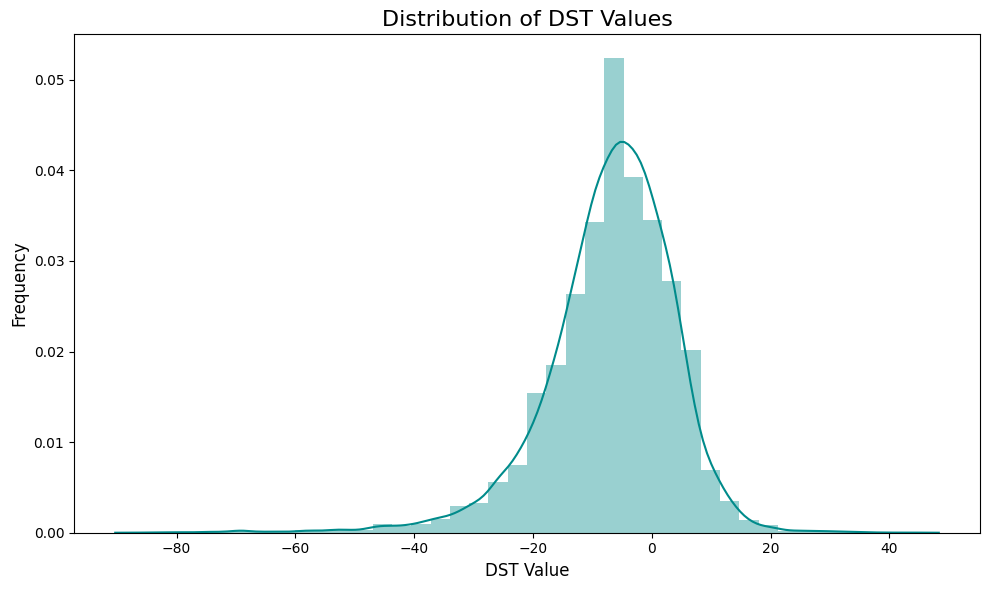

In [115]:
# Distribution plot for DST values
plt.figure(figsize=(10, 6))
sns.distplot(y_test, kde=True, color="darkcyan", bins=40)

plt.title("Distribution of DST Values", fontsize=16)
plt.xlabel("DST Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(False)  # <- removed scale lines
plt.tight_layout()
plt.show()

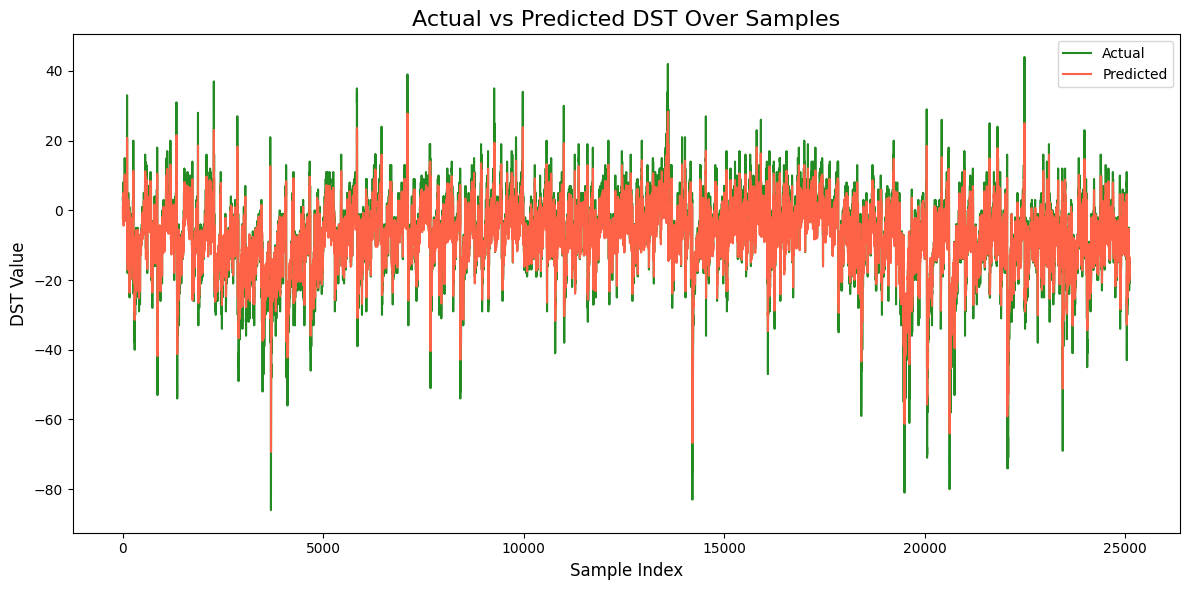

In [116]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='forestgreen')
plt.plot(y_pred, label='Predicted', color='tomato')
plt.title("Actual vs Predicted DST Over Samples", fontsize=16)
plt.xlabel("Sample Index", fontsize=12)
plt.ylabel("DST Value", fontsize=12)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

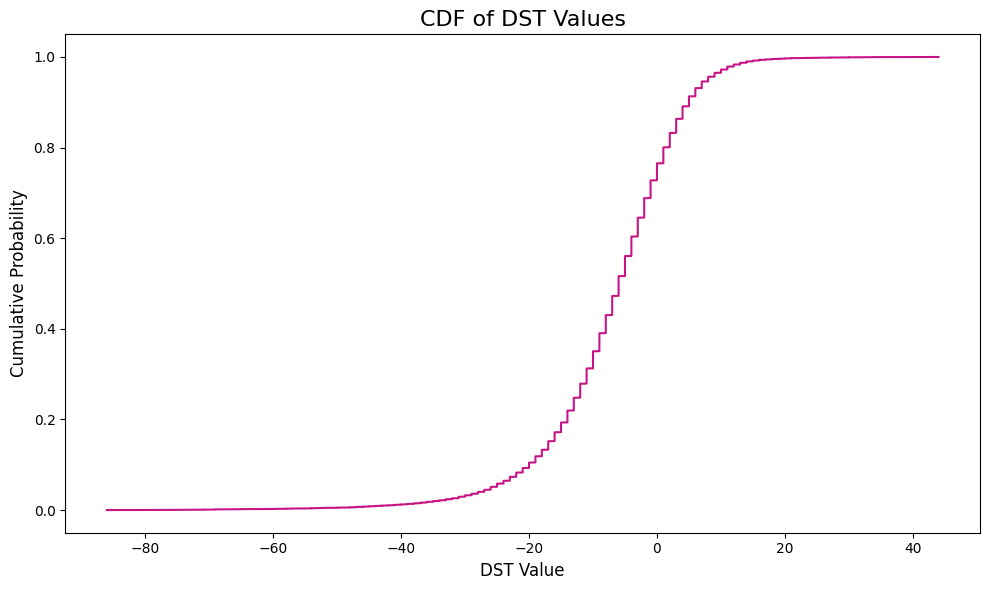

In [117]:
import numpy as np

sorted_vals = np.sort(y_test)
cdf = np.arange(len(sorted_vals)) / float(len(sorted_vals))

plt.figure(figsize=(10, 6))
plt.plot(sorted_vals, cdf, color='mediumvioletred')
plt.title("CDF of DST Values", fontsize=16)
plt.xlabel("DST Value", fontsize=12)
plt.ylabel("Cumulative Probability", fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()


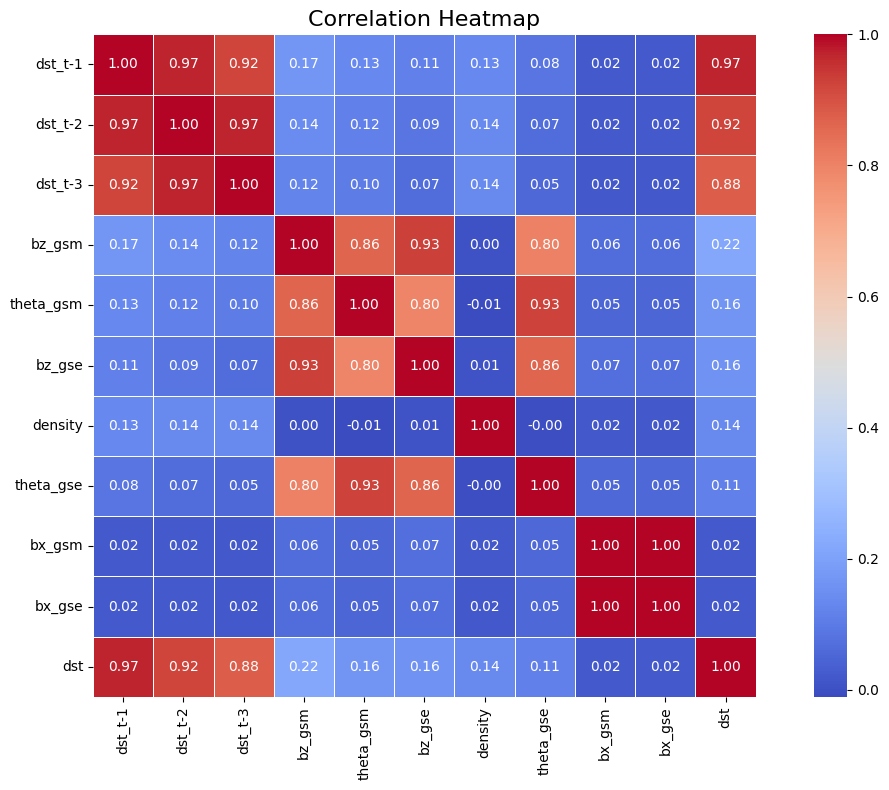

In [118]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()


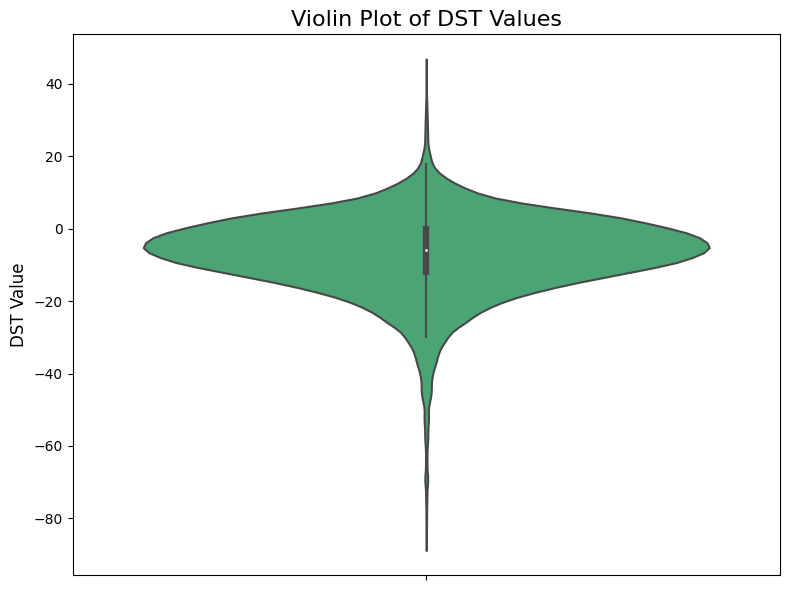

In [119]:
plt.figure(figsize=(8, 6))
sns.violinplot(y=y_test, color='mediumseagreen')
plt.title("Violin Plot of DST Values", fontsize=16)
plt.ylabel("DST Value", fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()


In [120]:
import pandas as pd
import plotly.express as px

df_metrics = pd.DataFrame(metrics, index=['RMSE', 'R2', 'MAE']).T.reset_index()
df_metrics.rename(columns={'index': 'Model'}, inplace=True)

fig = px.parallel_coordinates(
    df_metrics,
    color='R2',
    dimensions=['RMSE', 'R2', 'MAE'],
    color_continuous_scale=px.colors.sequential.Viridis,
    title="Parallel Coordinates of Model Performance"
)
fig.show()


NameError: name 'metrics' is not defined